<a href="https://colab.research.google.com/github/Krishikamalhotra/PRODIGY_DS_04/blob/main/prodigytask4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies
!pip install textblob
!pip install wordcloud


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving twitter_training.csv.zip to twitter_training.csv.zip


In [ ]:
import zipfile
import pandas as pd

# Unzip the file
with zipfile.ZipFile("twitter_training.csv.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Load the CSV
df = pd.read_csv("twitter_training.csv", header=None)
df.head()


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# Rename columns
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

# Check basic info
print(df.info())
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [ ]:
import re

def clean_text(text):
    text = str(text).lower()                             # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'\@\w+|\#','', text)                  # remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)                  # remove punctuation
    text = re.sub(r'\d+', '', text)                      # remove numbers
    text = re.sub(r'\s+', ' ', text).strip()             # remove extra spaces
    return text

# Apply cleaning
df['Clean_Tweet'] = df['Tweet'].apply(clean_text)

# View cleaned data
df[['Tweet', 'Clean_Tweet']].head(10)


,Tweet,Clean_Tweet
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...
5,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
6,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...
7,So I spent a couple of hours doing something f...,so i spent a couple of hours doing something f...
8,So I spent a few hours doing something for fun...,so i spent a few hours doing something for fun...
9,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...


/tmp/ipython-input-2183413826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


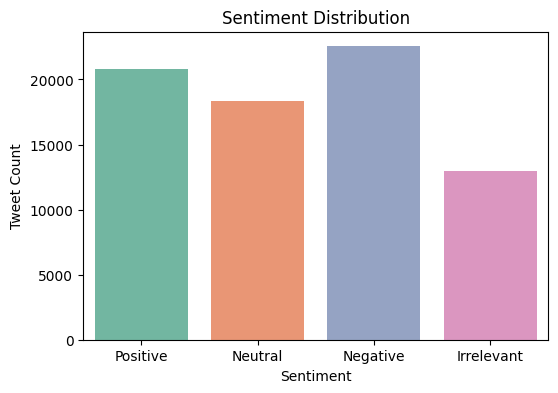

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


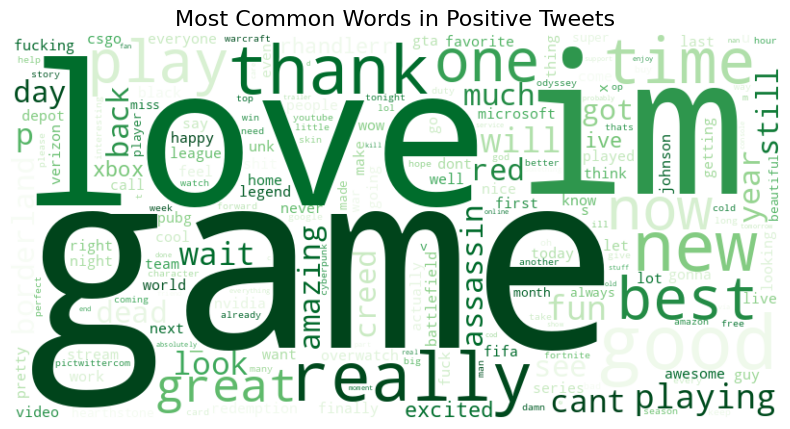

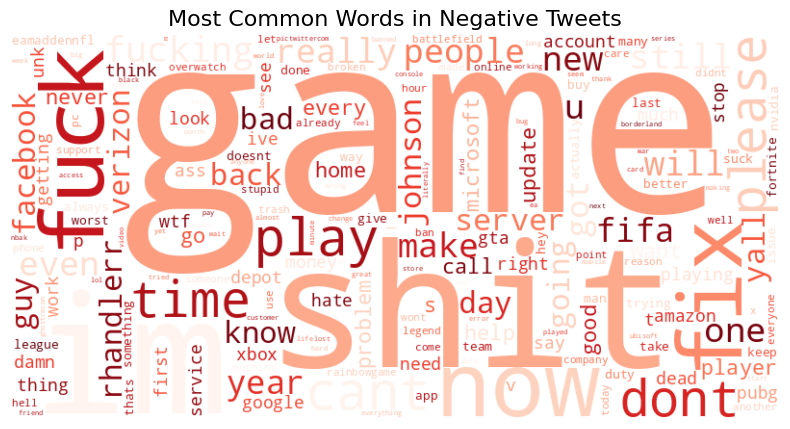

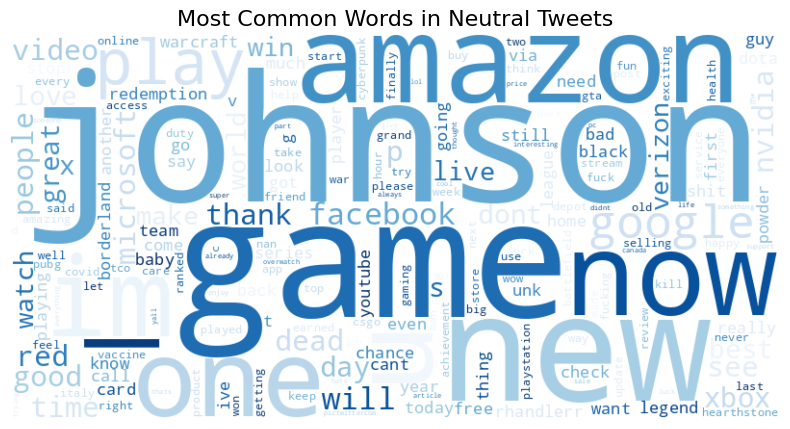

In [ ]:
from wordcloud import WordCloud

# Function to plot word cloud for a given sentiment
def plot_wordcloud(sentiment, color):
    text = " ".join(df[df['Sentiment'] == sentiment]['Clean_Tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap=color, collocations=False).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most Common Words in {sentiment} Tweets", fontsize=16)
    plt.show()

# Generate word clouds
plot_wordcloud("Positive", "Greens")
plot_wordcloud("Negative", "Reds")
plot_wordcloud("Neutral", "Blues")
